In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [23]:
df=pd.read_csv('employee.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [18]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

no null values are present in the dataset.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [21]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

huge gap in 75% and maximum value
therefore outliers are present.

data visualization

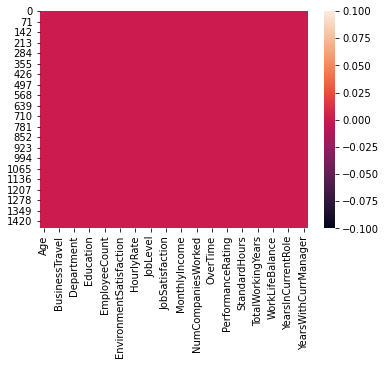

In [25]:
sns.heatmap(df.isnull())

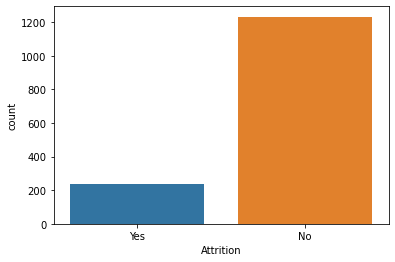

In [29]:
sns.countplot(x=df['Attrition'])

roughly around 235 employee have left the given company and rest stayed.

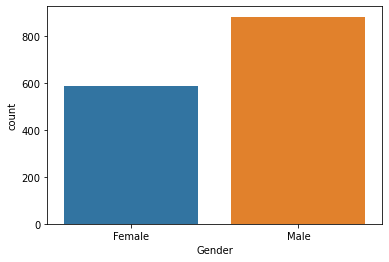

In [31]:
sns.countplot(x=df['Gender'])

males are more than than the females.

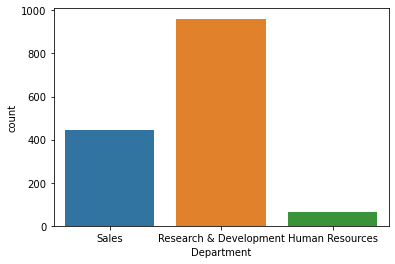

In [32]:
sns.countplot(x=df['Department'])

more people are in research & development department.

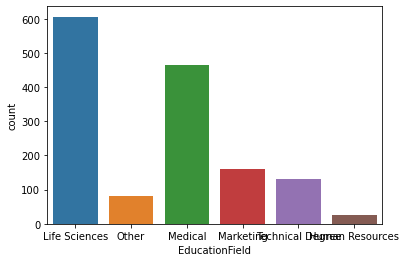

In [33]:
sns.countplot(x=df['EducationField'])

most peoples are from life sciences background and least are from human resource.

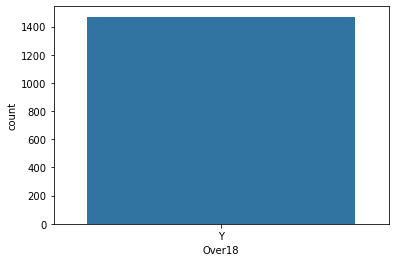

In [35]:
sns.countplot(x=df['Over18'])

all the population are above 18 so we can drop this column as there is no use of this.

In [36]:
df.drop(['Over18'],axis=1,inplace=True)

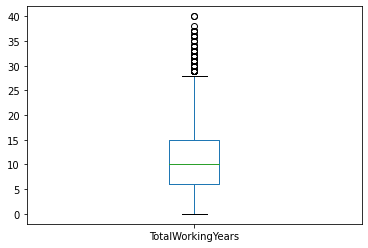

In [45]:
df['TotalWorkingYears'].plot.box()

outliers are present in the dataset. 

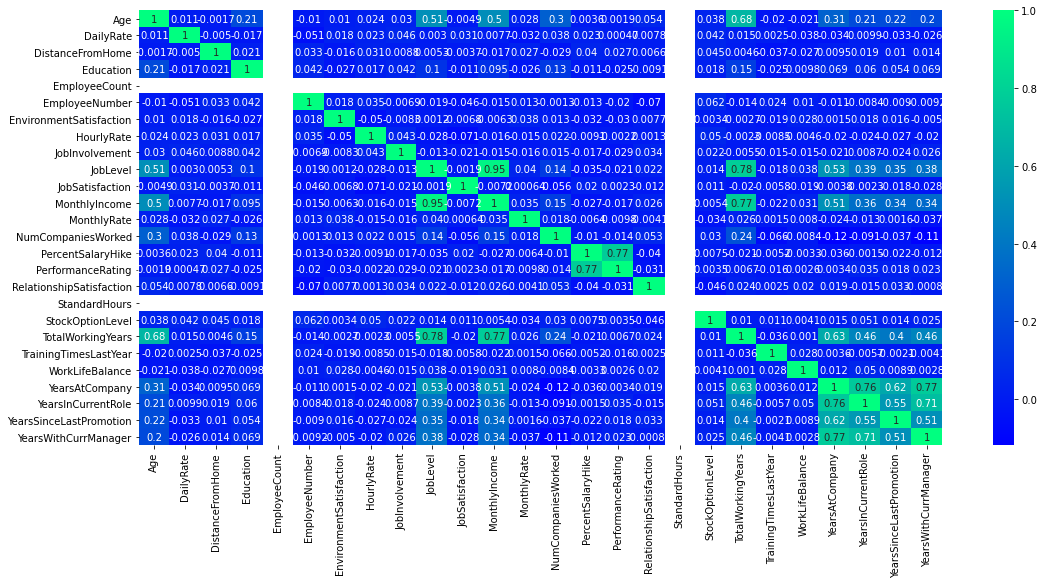

In [55]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,cmap='winter')

In [57]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [59]:
df['JobLevel']=np.log1p(df['JobLevel'])

In [60]:
df['YearsSinceLastPromotion']=np.log1p(df['YearsSinceLastPromotion'])

In [61]:
df['YearsAtCompany']=np.log1p(df['YearsAtCompany'])

In [62]:
df['PerformanceRating']=np.log1p(df['PerformanceRating'])

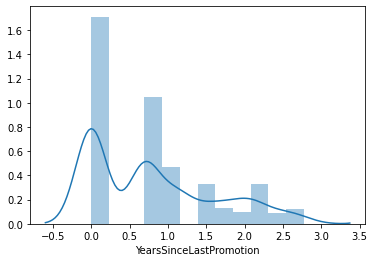

In [64]:
sns.distplot(df['YearsSinceLastPromotion'])

In [66]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.207708
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     0.718805
YearsWithCurrManager        0.833451
dtype: float64

correcting all the skewness.

# bivirate analysis.

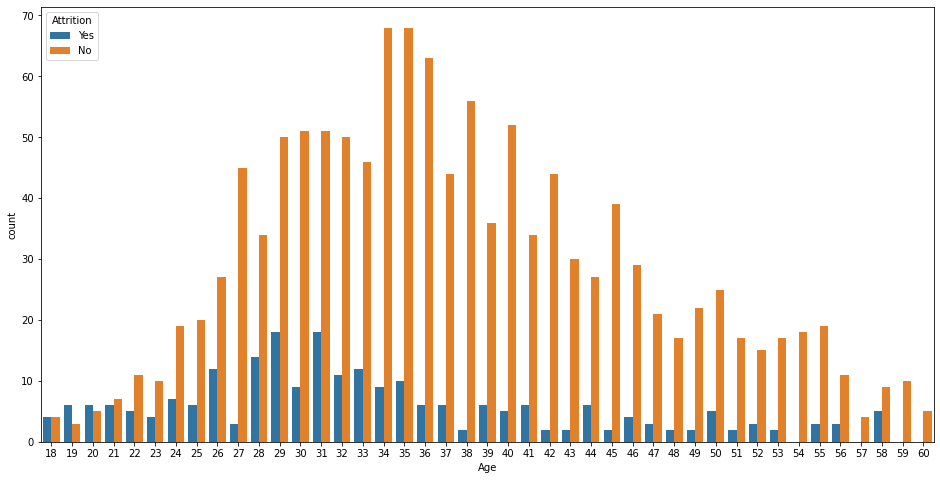

In [69]:
plt.figure(figsize=(16,8))
sns.countplot(x='Age',hue='Attrition',data=df)

age wise attrition rate.

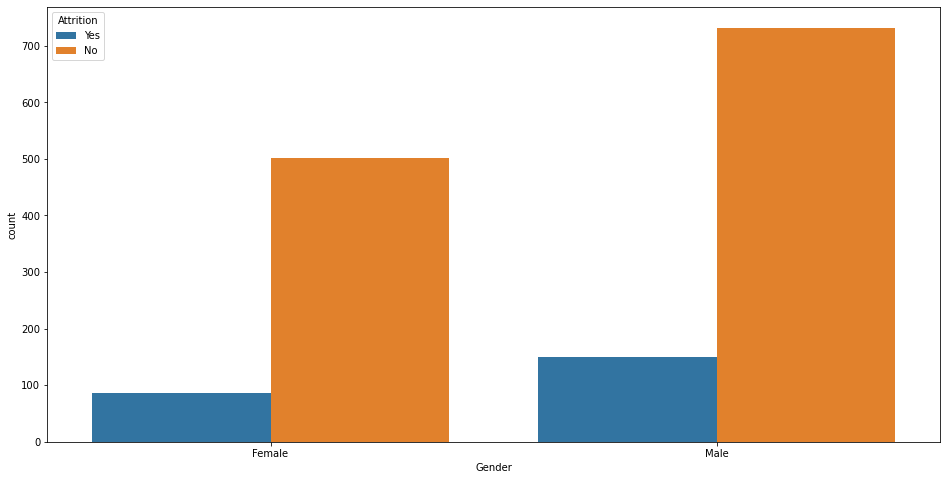

In [70]:
plt.figure(figsize=(16,8))
sns.countplot(x='Gender',hue='Attrition',data=df)

more males have left the company then females.

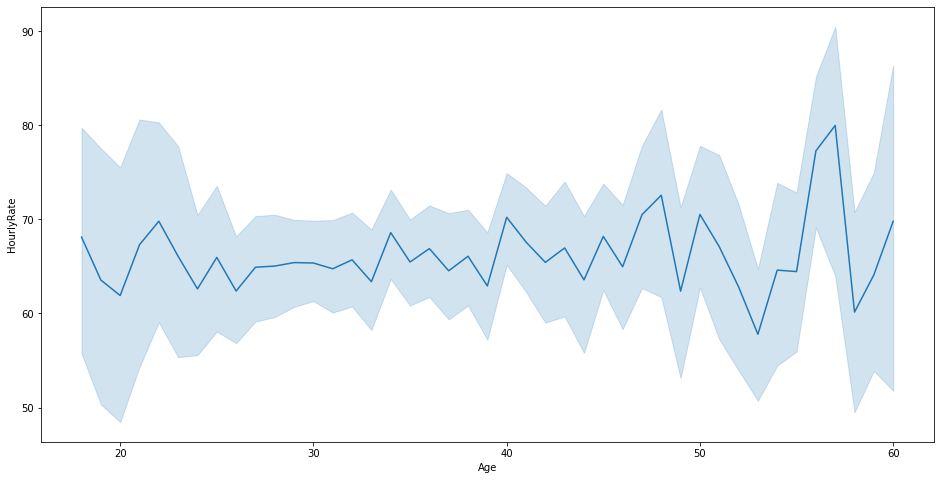

In [73]:
plt.figure(figsize=(16,8))
sns.lineplot(x='Age',y='HourlyRate',data=df)

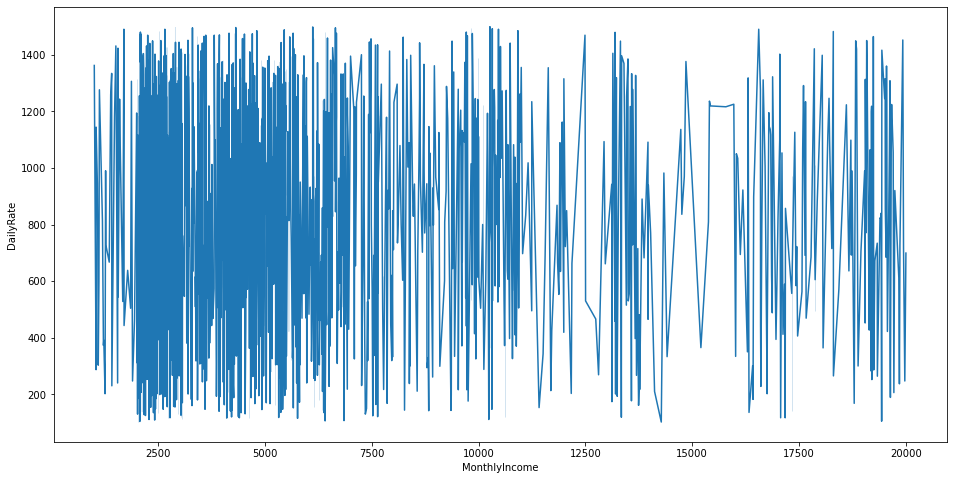

In [75]:
plt.figure(figsize=(16,8))
sns.lineplot(y='DailyRate',x='MonthlyIncome',data=df)

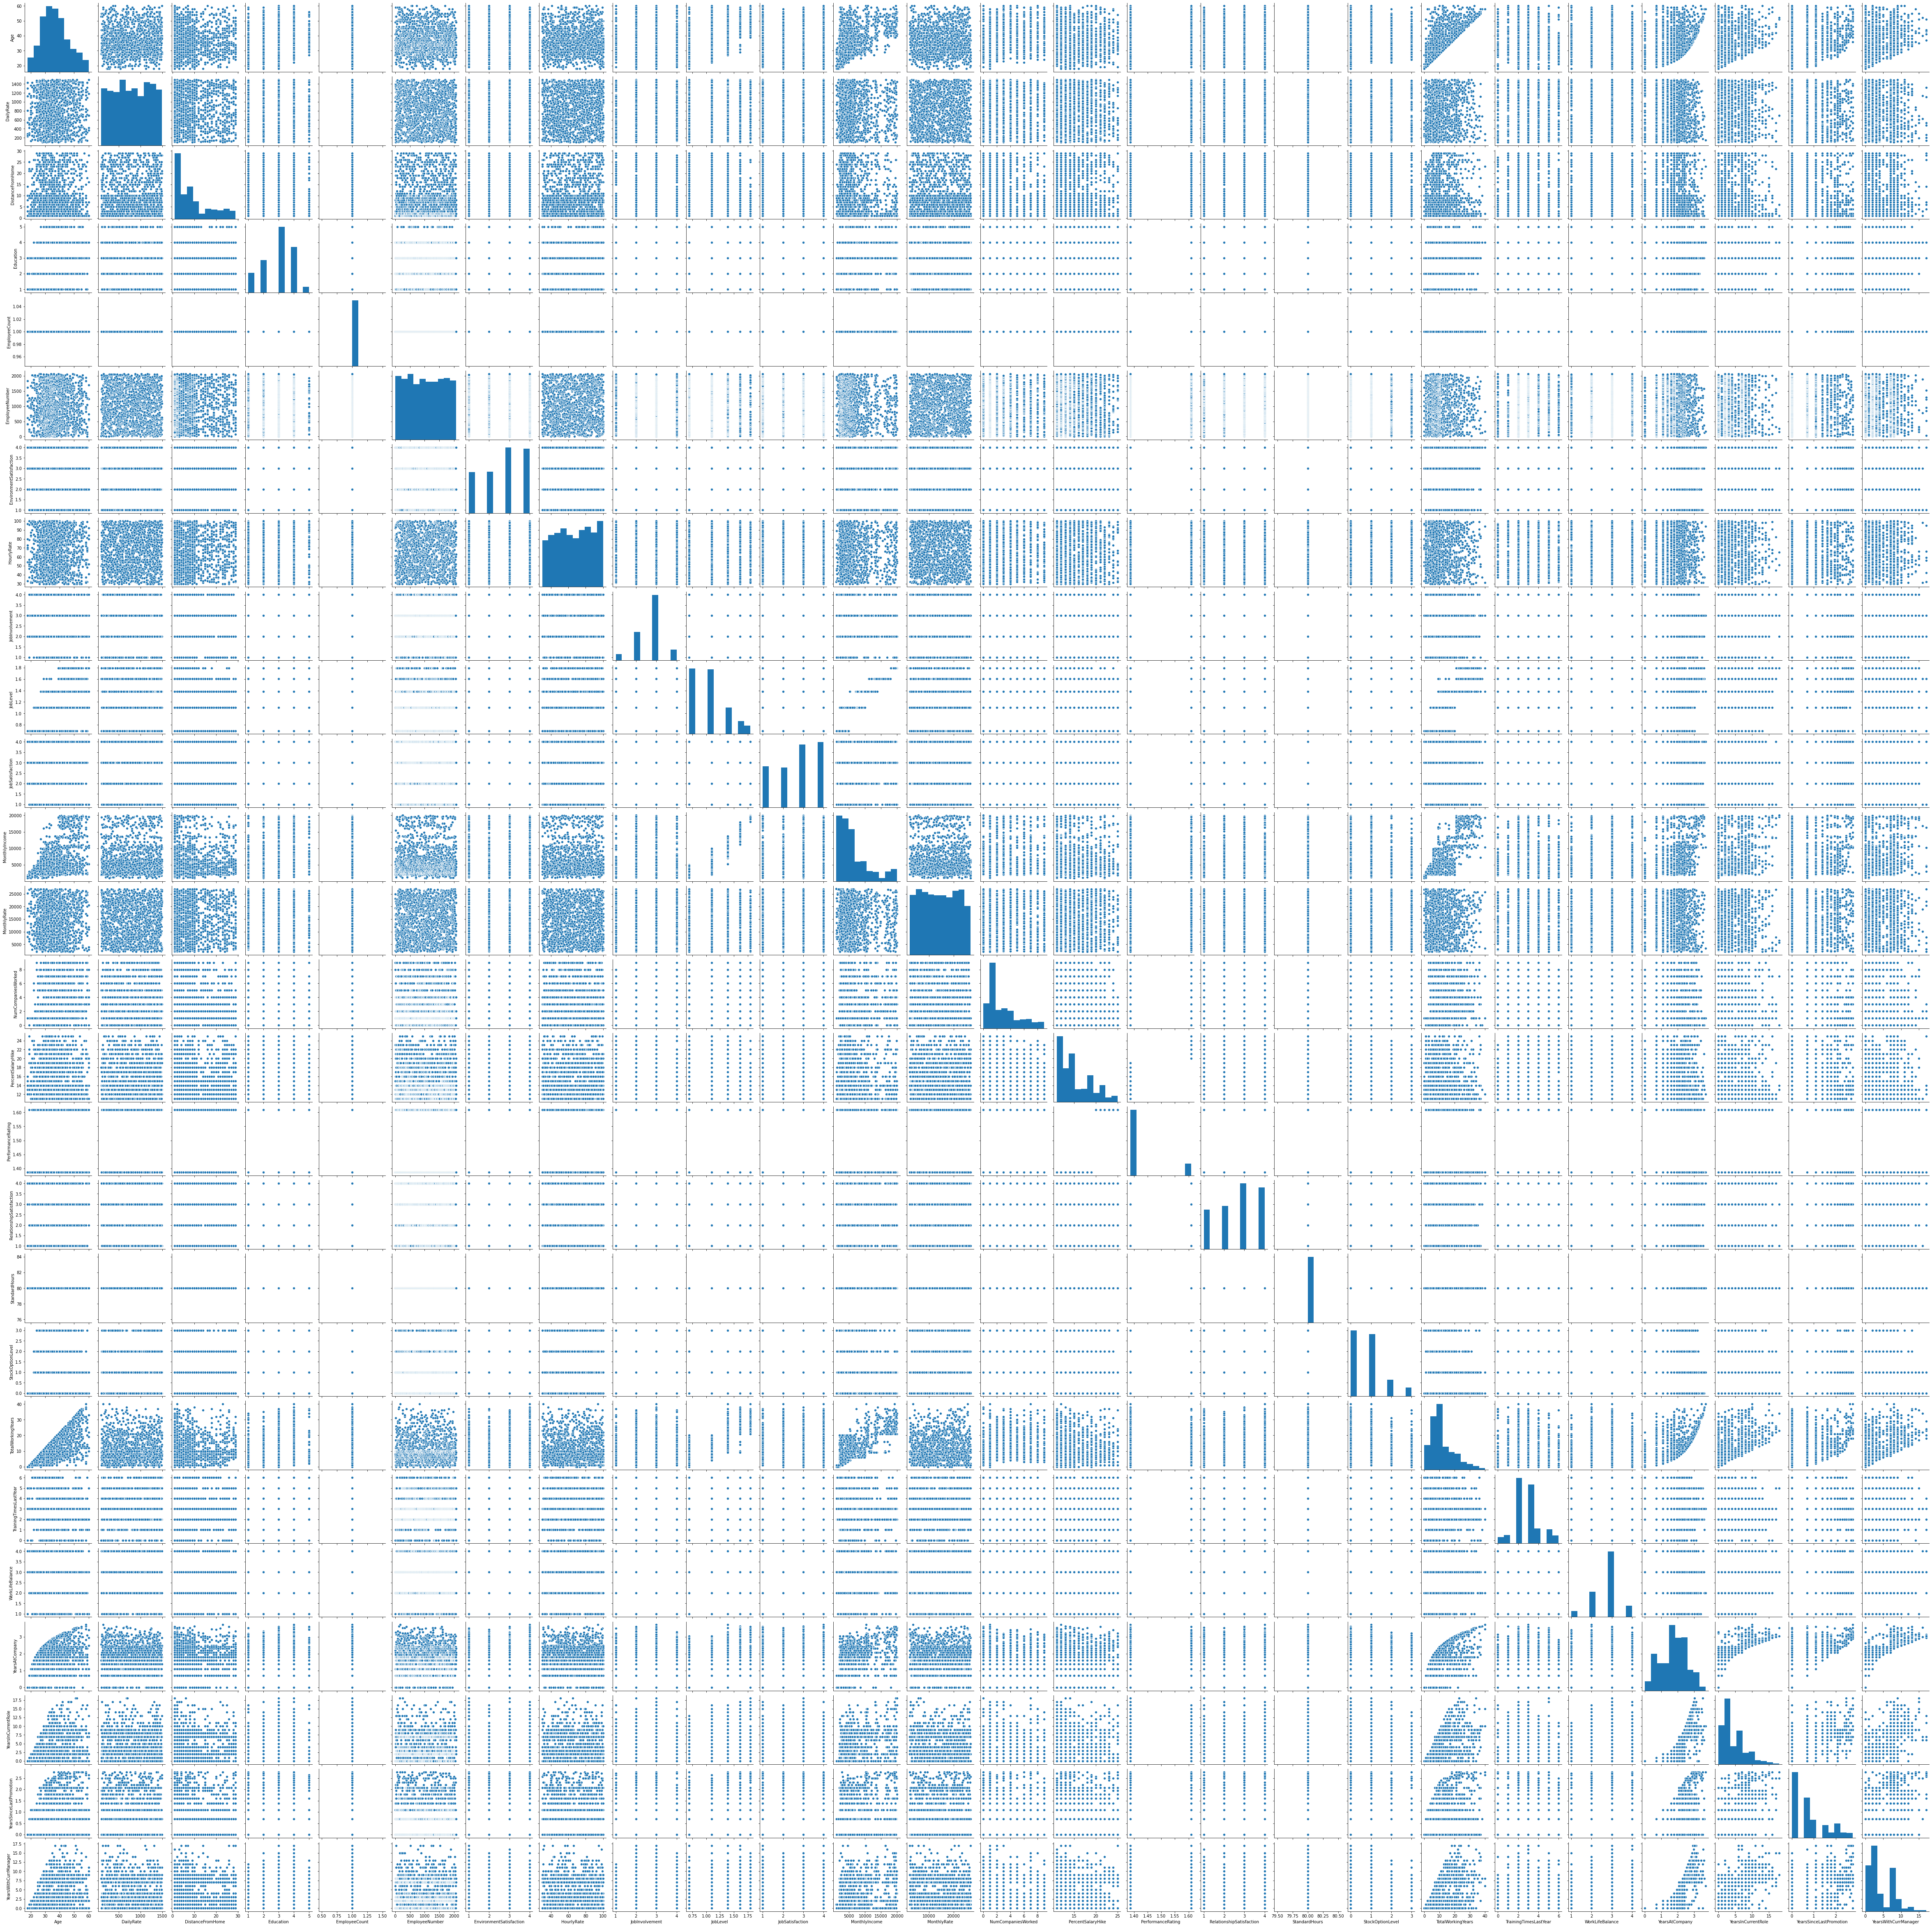

In [76]:
sns.pairplot(df)

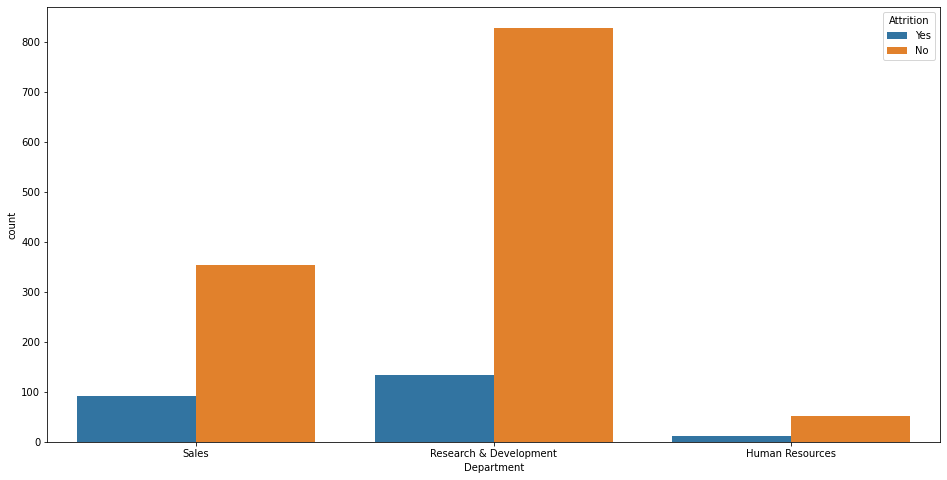

In [77]:
plt.figure(figsize=(16,8))
sns.countplot(x='Department',hue='Attrition',data=df)

people who are in reseach department have more attrition rate

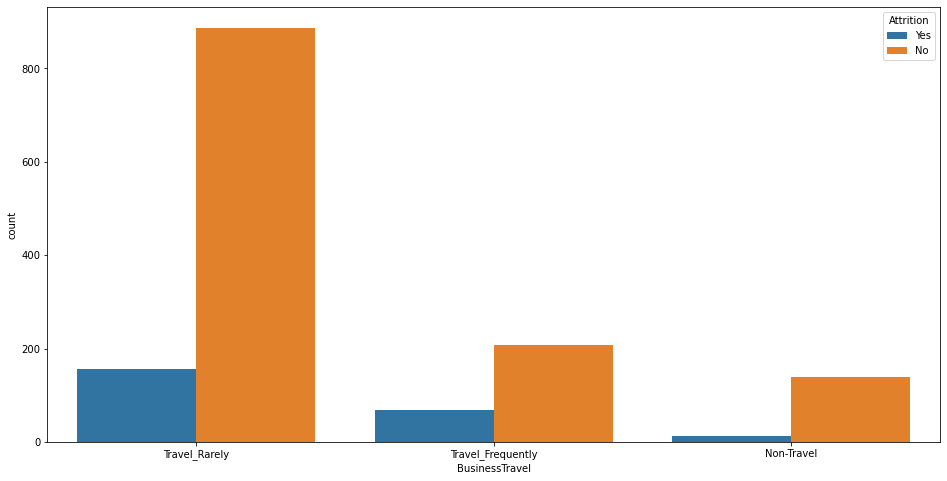

In [81]:
plt.figure(figsize=(16,8))
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)

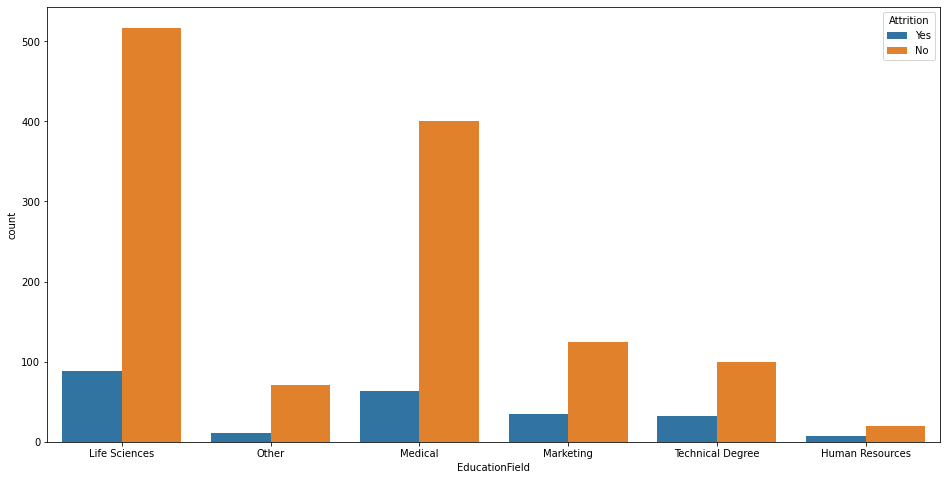

In [82]:
plt.figure(figsize=(16,8))
sns.countplot(x='EducationField',hue='Attrition',data=df)

people who are in life sciences have more attrition rate

# removing outliers

In [91]:
df.drop(['Age'],axis=1,inplace=True)

In [87]:
df['StandardHours'].unique()

array([80], dtype=int64)

In [92]:
df.drop(['StandardHours'],axis=1,inplace=True)

In [89]:
df['EmployeeCount'].unique()

array([1], dtype=int64)

In [93]:
df.drop(['EmployeeCount'],axis=1,inplace=True)

In [95]:
df['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

In [96]:
df.drop(['EmployeeNumber'],axis=1,inplace=True)

In [97]:
df

Attrition     BusinessTravel  DailyRate              Department  \
0          Yes      Travel_Rarely       1102                   Sales   
1           No  Travel_Frequently        279  Research & Development   
2          Yes      Travel_Rarely       1373  Research & Development   
3           No  Travel_Frequently       1392  Research & Development   
4           No      Travel_Rarely        591  Research & Development   
...        ...                ...        ...                     ...   
1465        No  Travel_Frequently        884  Research & Development   
1466        No      Travel_Rarely        613  Research & Development   
1467        No      Travel_Rarely        155  Research & Development   
1468        No  Travel_Frequently       1023                   Sales   
1469        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female          94  ...           1.386294                         1   
1       Male          61  ...           1.609438                         4   
2       Male          92  ...           1.386294                         2   
3     Female          56  ...           1.386294                         3   
4       Male          40  ...           1.386294                         4   
...      ...         ...  ...                ...                       ...   
1465    Male          41  ...           1.386294                         3   
1466    Male          42  ...           1.386294                         1   
1467    Male          87  ...           1.609438                         2   
1468    Male          63  ...           1.386294                         4   
1469    Male          82  ...           1.386294                         1   

     StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
0                   0                  8                     0   
1                   1                 10                     3   
2                   0                  7                     3   
3                   0                  8                     3   
4                   1                  6                     3   
...               ...                ...                   ...   
1465                1                 17                     3   
1466                1                  9                     5   
1467                1                  6                     0   
1468                0                 17                     3   
1469                0                  6                     3   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   1        1.945910                   4   
1                   3        2.397895                   7   
2                   3        0.000000                   0   
3                   3        2.197225                   7   
4                   3        1.098612                   2   
...               ...             ...                 ...   
1465                3        1.791759                   2 

In [99]:
df.dtypes

Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                    float64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           float64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              float64
YearsInCurrentRole          

In [102]:
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])

In [104]:
df['OverTime']=le.fit_transform(df['OverTime'])

In [105]:
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

In [107]:
df['JobRole']=le.fit_transform(df['JobRole'])

In [108]:
df['Gender']=le.fit_transform(df['Gender'])

In [109]:
df['EducationField']=le.fit_transform(df['EducationField'])

In [112]:
df['Department']=le.fit_transform(df['Department'])

In [113]:
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])

In [114]:
df.dtypes

Attrition                     int32
BusinessTravel                int32
DailyRate                     int64
Department                    int32
DistanceFromHome              int64
Education                     int64
EducationField                int32
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int64
JobInvolvement                int64
JobLevel                    float64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int32
PercentSalaryHike             int64
PerformanceRating           float64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              float64
YearsInCurrentRole          

all the values are now converted into numerical form.

In [115]:
df

Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0             1               2       1102           2                 1   
1             0               1        279           1                 8   
2             1               2       1373           1                 2   
3             0               1       1392           1                 3   
4             0               2        591           1                 2   
...         ...             ...        ...         ...               ...   
1465          0               1        884           1                23   
1466          0               2        613           1                 6   
1467          0               2        155           1                 4   
1468          0               1       1023           2                 2   
1469          0               2        628           1                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0             2               1                        2       0          94   
1             1               1                        3       1          61   
2             2               4                        4       1          92   
3             4               1                        4       0          56   
4             1               3                        1       1          40   
...         ...             ...                      ...     ...         ...   
1465          2               3                        3       1          41   
1466          1               3                        4       1          42   
1467          3               1                        2       1          87   
1468          3               3                        4       1          63   
1469          3               3                        2       1          82   

      ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0     ...           1.386294                         1                 0   
1     ...           1.609438                         4                 1   
2     ...           1.386294                         2                 0   
3     ...           1.386294                         3                 0   
4     ...           1.386294                         4                 1   
...   ...                ...                       ...               ...   
1465  ...           1.386294                         3                 1   
1466  ...           1.386294                         1                 1   
1467  ...           1.609438                         2                 1   
1468  ...           1.386294                         4                 0   
1469  ...           1.386294                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0           1.945910                   4                 0.000000   
1           2.397895                   7                 0.693147   
2           0.000000                   0                 0.000000   
3           2.197225                   7                 1.386294   
4           1.098612                   2                 1.098612   


In [122]:
threshold=3
z=np.abs(zscore(df))

In [123]:
df_new=df[(z<3).all(axis=1)]

In [125]:
df_new.shape

(1430, 30)

outliers are removed from our dataset

In [134]:
x=df_new.drop(['Attrition'],axis=1)

In [135]:
y=df_new['Attrition']

In [136]:
sc=StandardScaler()

In [137]:
x=sc.fit_transform(x)

In [139]:
x=pd.DataFrame(x)

In [146]:
model=[LogisticRegression(),GaussianNB(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]

In [154]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80,random_state=42)
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('the accuracy score of',m,'is:',accuracy_score(y_test,predm))
    print('the confusion matrix of',m,'is:',confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('_________________________________________________________________')

0.8854895104895105
the accuracy score of LogisticRegression() is: 0.8321678321678322
the confusion matrix of LogisticRegression() is: [[224   7]
 [ 41  14]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       231
           1       0.67      0.25      0.37        55

    accuracy                           0.83       286
   macro avg       0.76      0.61      0.64       286
weighted avg       0.81      0.83      0.80       286

_________________________________________________________________
0.7875874125874126
the accuracy score of GaussianNB() is: 0.7622377622377622
the confusion matrix of GaussianNB() is: [[189  42]
 [ 26  29]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       231
           1       0.41      0.53      0.46        55

    accuracy                           0.76       286
   macro avg       0.64      0.67      0.65       286
weighted avg       0.79      0.76    

so accoarding to our model SVC() is giving the best accuracy with least errors.

In [156]:
svc=SVC()
parameters={'kernel':['rbf','linear','poly'],'random_state':range(40,100)}
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
clf.best_params_

{'kernel': 'linear', 'random_state': 40}

In [158]:
svc=SVC(kernel='linear',random_state=40)
svc.fit(x_train,y_train)
print('score',svc.score(x_train,y_train))
predsvc=svc.predict(x_test)
print('Accuracy score',accuracy_score(y_test,predsvc))
print('confusion matrix',confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

score 0.8846153846153846
Accuracy score 0.8286713286713286
confusion matrix [[224   7]
 [ 42  13]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       231
           1       0.65      0.24      0.35        55

    accuracy                           0.83       286
   macro avg       0.75      0.60      0.62       286
weighted avg       0.81      0.83      0.79       286



our model is getting the maximum score at random_state 40 

In [161]:
scores=cross_val_score(svc,x,y,cv=5)
print('scores-',scores)
print('the mean scores-',scores.mean())
print('the standard deviation-',scores.std())

scores- [0.86713287 0.84965035 0.85314685 0.87062937 0.86713287]
the mean scores- 0.8615384615384617
the standard deviation- 0.008449682499017161


saving the best model SVC() as of now.

# using the ensemble techniques to boost up the model

In [167]:
rf=RandomForestClassifier(n_estimators=80,random_state=40)
rf.fit(x_train,y_train)
print('score:-',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('the accuracy score:-',accuracy_score(y_test,predrf))
print('the confusion matrix:-',confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


score:- 0.9991258741258742
the accuracy score:- 0.8286713286713286
the confusion matrix:- [[230   1]
 [ 48   7]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.90       231
           1       0.88      0.13      0.22        55

    accuracy                           0.83       286
   macro avg       0.85      0.56      0.56       286
weighted avg       0.84      0.83      0.77       286



In [175]:
ad=AdaBoostClassifier(base_estimator=SVC(kernel='linear'),n_estimators=80,random_state=40,algorithm='SAMME',learning_rate=0.1)
ad.fit(x_train,y_train)
print('score:-',ad.score(x_train,y_train))
predad=ad.predict(x_test)
print('the accuracy score:-',accuracy_score(y_test,predad))
print('the confusion matrix:-',confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

score:- 0.8793706293706294
the accuracy score:- 0.8496503496503497
the confusion matrix:- [[226   5]
 [ 38  17]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       231
           1       0.77      0.31      0.44        55

    accuracy                           0.85       286
   macro avg       0.81      0.64      0.68       286
weighted avg       0.84      0.85      0.82       286



In [178]:
gb=GradientBoostingClassifier(random_state=40)
gb.fit(x_train,y_train)
print('score:-',gb.score(x_train,y_train))
predgb=gb.predict(x_test)
print('the accuracy score:-',accuracy_score(y_test,predgb))
print('the confusion matrix:-',confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

score:- 0.9545454545454546
the accuracy score:- 0.8321678321678322
the confusion matrix:- [[226   5]
 [ 43  12]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       231
           1       0.71      0.22      0.33        55

    accuracy                           0.83       286
   macro avg       0.77      0.60      0.62       286
weighted avg       0.81      0.83      0.79       286



according to this we save our best model that is Randomforestclassifier

In [182]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

# roc_auc_curve

In [183]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [184]:
y_pred_prob

array([4.36043927e-02, 7.84230090e-02, 1.04672512e-01, 6.31522696e-01,
       1.04739888e-01, 3.43380084e-02, 4.05561022e-01, 6.46309334e-01,
       1.83381054e-01, 3.62873834e-01, 2.24639804e-03, 5.90713663e-02,
       2.40300061e-01, 1.29154836e-01, 1.86003229e-02, 9.32293908e-02,
       2.06485829e-03, 5.76395899e-02, 3.80247294e-02, 3.63245515e-01,
       6.17499305e-01, 6.80414759e-02, 2.21804722e-01, 2.72410161e-02,
       6.19391067e-02, 9.30055306e-02, 1.87238778e-03, 2.10452839e-02,
       3.72298693e-02, 3.04243271e-01, 2.48802209e-01, 1.38916931e-01,
       4.61494015e-02, 1.93524932e-02, 2.96946117e-02, 7.66864067e-02,
       1.90993267e-03, 2.31840507e-01, 3.72925783e-02, 4.37347158e-01,
       5.69475021e-02, 5.28839199e-03, 7.44288548e-02, 6.87822658e-02,
       1.85918700e-02, 2.60919932e-02, 6.96045932e-02, 6.82636169e-03,
       2.83019185e-02, 2.87851455e-01, 1.91557820e-01, 3.61161475e-01,
       9.93270952e-02, 1.26005338e-01, 2.08999236e-02, 3.71159968e-01,
      

In [187]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [188]:
fpr

array([0.        , 0.        , 0.        , 0.004329  , 0.004329  ,
       0.00865801, 0.00865801, 0.01298701, 0.01298701, 0.02164502,
       0.02164502, 0.03030303, 0.03030303, 0.03463203, 0.03463203,
       0.04329004, 0.04329004, 0.05194805, 0.05194805, 0.05627706,
       0.05627706, 0.06926407, 0.06926407, 0.07792208, 0.07792208,
       0.08658009, 0.08658009, 0.0952381 , 0.0952381 , 0.1038961 ,
       0.1038961 , 0.12554113, 0.12554113, 0.13852814, 0.13852814,
       0.14285714, 0.14285714, 0.16450216, 0.16450216, 0.17316017,
       0.17316017, 0.18181818, 0.18181818, 0.19480519, 0.19480519,
       0.23376623, 0.23376623, 0.23809524, 0.23809524, 0.3030303 ,
       0.3030303 , 0.37662338, 0.37662338, 0.38095238, 0.38095238,
       0.39393939, 0.39393939, 0.42857143, 0.42857143, 0.46753247,
       0.46753247, 0.48917749, 0.48917749, 0.53246753, 0.53246753,
       0.63203463, 0.63203463, 0.67965368, 0.67965368, 0.76190476,
       0.76190476, 0.76623377, 0.76623377, 0.78787879, 0.78787

In [189]:
tpr

array([0.        , 0.01818182, 0.12727273, 0.12727273, 0.14545455,
       0.14545455, 0.16363636, 0.16363636, 0.18181818, 0.18181818,
       0.21818182, 0.21818182, 0.25454545, 0.25454545, 0.29090909,
       0.29090909, 0.30909091, 0.30909091, 0.34545455, 0.34545455,
       0.36363636, 0.36363636, 0.4       , 0.4       , 0.41818182,
       0.41818182, 0.43636364, 0.43636364, 0.45454545, 0.45454545,
       0.49090909, 0.49090909, 0.50909091, 0.50909091, 0.54545455,
       0.54545455, 0.58181818, 0.58181818, 0.6       , 0.6       ,
       0.61818182, 0.61818182, 0.63636364, 0.63636364, 0.65454545,
       0.65454545, 0.67272727, 0.67272727, 0.69090909, 0.69090909,
       0.70909091, 0.70909091, 0.72727273, 0.72727273, 0.74545455,
       0.74545455, 0.76363636, 0.76363636, 0.78181818, 0.78181818,
       0.8       , 0.8       , 0.81818182, 0.81818182, 0.83636364,
       0.83636364, 0.85454545, 0.85454545, 0.87272727, 0.87272727,
       0.89090909, 0.89090909, 0.90909091, 0.90909091, 0.92727

In [190]:
thresholds

array([1.97660076e+00, 9.76600755e-01, 8.36105321e-01, 7.75649683e-01,
       7.07198438e-01, 7.00294534e-01, 6.91430305e-01, 6.85169495e-01,
       6.71140463e-01, 6.46309334e-01, 6.17499305e-01, 5.75852692e-01,
       5.57505997e-01, 4.74314573e-01, 4.54385059e-01, 4.33309778e-01,
       4.25411763e-01, 4.09778860e-01, 4.00744605e-01, 3.81762390e-01,
       3.71159968e-01, 3.61769641e-01, 3.47750010e-01, 3.28873903e-01,
       3.24885822e-01, 3.18251667e-01, 3.06926748e-01, 2.87851455e-01,
       2.86160884e-01, 2.62655088e-01, 2.59119422e-01, 2.39066174e-01,
       2.34031685e-01, 2.28949866e-01, 2.25052700e-01, 2.21804722e-01,
       2.12913096e-01, 2.08157046e-01, 2.00962118e-01, 1.91557820e-01,
       1.91205490e-01, 1.86637074e-01, 1.85441795e-01, 1.83381054e-01,
       1.69007922e-01, 1.57256536e-01, 1.55076762e-01, 1.45892826e-01,
       1.42859115e-01, 1.05581468e-01, 1.04739888e-01, 8.13453357e-02,
       8.13295229e-02, 7.84230090e-02, 7.77797981e-02, 7.51433833e-02,
      

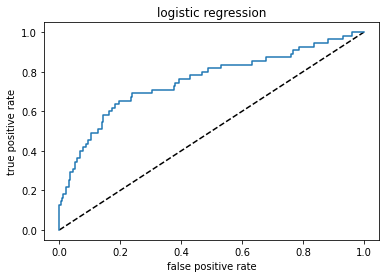

In [191]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('logistic regression')
plt.show()

In [192]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [193]:
auc_score

0.6121212121212121

In [194]:
import joblib

In [195]:
joblib.dump(rf,'HR_Attritionpredictedfile.pkl')

['HR_Attritionpredictedfile.pkl']